## Experiment: Generated Image Quality with Log-weights along the path.

Plot the metric results of the generated images along with their log_weights.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
metrics_results = pd.read_csv('output/metrics_results.csv')
log_w_progress = pd.read_csv('output/log_w_progress.csv')

### Correlation between final accumulated ```log_weights``` with image quality score

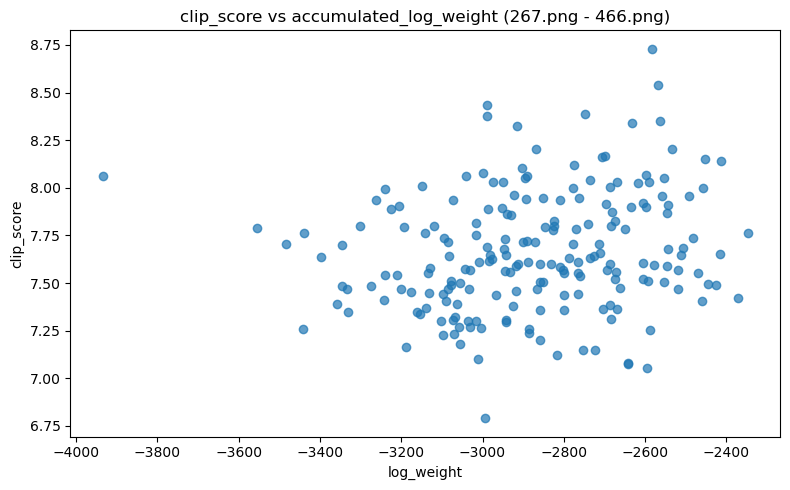

In [3]:
# 筛选 image_name 从 267.png 到 466.png 的行
df_sub = metrics_results.copy()
df_sub["_num"] = df_sub["image_name"].str.replace(".png", "", regex=False).astype(int)
df_sub = df_sub[(df_sub["_num"] >= 267) & (df_sub["_num"] <= 466)].drop(columns=["_num"])

# 横轴 log_weight，纵轴 clip_score
plt.figure(figsize=(8, 5))
plt.scatter(df_sub["log_weight"], df_sub["laion_score"], alpha=0.7)
plt.xlabel("log_weight")
plt.ylabel("clip_score")
plt.title("clip_score vs accumulated_log_weight (267.png - 466.png)")
plt.tight_layout()
plt.show()

In [4]:
# Fit linear regression of clip_score vs log_weight
import numpy as np
from sklearn.linear_model import LinearRegression

clip_scores = df_sub["clip_score"].values
log_weights = df_sub["log_weight"].values

model = LinearRegression()
model.fit(log_weights.reshape(-1, 1), clip_scores)
slope = model.coef_[0]

r2 = model.score(log_weights.reshape(-1, 1), clip_scores)
print(f"R2 coef between CLIP score and log_weight: {r2:.4f}")


R2 coef between CLIP score and log_weight: 0.0002


There doesn't seem to be a correlation between the log_weights with the image quality (CLIP / LAION-score) at all.

### Correlation between incremental ```log_weights``` with image quality score

In [9]:
# Compute the log_weights increments.
# log_w_increment: image_name 不变，Step_1 保持原样，Step_k = Step_k - Step_{k-1} (k>=2)

log_w_increment = log_w_progress[["image_name"]].copy()
step_cols = [f"Step_{i}" for i in range(1, 51)]
log_w_increment["Step_1"] = log_w_progress["Step_1"]
for i in range(2, 51):
    log_w_increment[f"Step_{i}"] = log_w_progress[f"Step_{i}"] - log_w_progress[f"Step_{i-1}"]
log_w_increment

,image_name,Step_1,Step_2,Step_3,Step_4,Step_5,Step_6,Step_7,Step_8,Step_9,...,Step_41,Step_42,Step_43,Step_44,Step_45,Step_46,Step_47,Step_48,Step_49,Step_50
0,245.png,-1993.0,-301.750,-226.875,-120.375,-110.6875,-87.6250,-69.9375,-62.25000,-53.59375,...,-10.335938,-10.242188,-10.242188,-10.000000,-9.750000,-10.132812,-10.906250,-13.039062,-21.187500,-6.738281
1,246.png,-1333.0,-355.500,-175.500,-131.750,-129.6250,-128.8750,-117.8750,-144.62500,-88.62500,...,-9.781250,-9.390625,-9.406250,-9.437500,-9.843750,-10.359375,-11.039062,-12.695312,-20.937500,-7.117188
2,247.png,-1275.0,-322.250,-174.375,-141.500,-147.2500,-118.0625,-84.7500,-52.18750,-52.15625,...,-10.000000,-9.625000,-9.437500,-9.210938,-9.843750,-10.078125,-11.093750,-13.820312,-21.484375,-6.683594
3,248.png,-1087.0,-211.875,-232.750,-212.875,-128.6250,-131.0000,-91.6250,-53.50000,-54.31250,...,-10.460938,-9.500000,-9.492188,-9.781250,-9.820312,-10.570312,-11.117188,-13.343750,-20.375000,-7.292969
4,249.png,-796.5,-447.250,-223.500,-229.375,-200.8750,-109.7500,-76.6875,-65.62500,-62.75000,...,-11.203125,-10.664062,-10.593750,-10.531250,-10.875000,-11.210938,-12.109375,-14.125000,-22.359375,-6.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,462.png,-718.5,-277.250,-318.250,-235.250,-170.1250,-139.8750,-80.2500,-78.37500,-78.25000,...,-8.203125,-7.535156,-7.355469,-7.371094,-7.398438,-7.371094,-7.914062,-8.687500,-13.320312,-4.933594
218,463.png,-547.0,-342.250,-158.000,-131.750,-81.2500,-67.3125,-69.5000,-58.53125,-54.93750,...,-9.437500,-8.796875,-8.960938,-8.437500,-8.742188,-8.250000,-9.109375,-10.468750,-15.507812,-5.339844
219,464.png,-571.0,-296.250,-141.250,-159.375,-178.8750,-81.5000,-61.6875,-51.34375,-47.21875,...,-9.312500,-9.117188,-9.476562,-9.476562,-9.335938,-9.156250,-9.695312,-11.031250,-16.937500,-5.644531
220,465.png,-588.0,-391.250,-256.000,-137.250,-83.2500,-88.5000,-74.0625,-64.06250,-59.90625,...,-9.898438,-9.023438,-8.929688,-8.523438,-8.421875,-8.507812,-8.968750,-10.421875,-16.218750,-5.562500


In [119]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler

# 1. 取 log_w_increment 中 267.png ~ 466.png 的 50 个 increment -> X (200×50)
step_cols = [f"Step_{i}" for i in range(1, 51)]
inc = log_w_increment.copy()
inc["_num"] = inc["image_name"].str.replace(".png", "", regex=False).astype(int)
inc = inc[(inc["_num"] >= 267) & (inc["_num"] <= 466)].drop(columns=["_num"])
X = inc[step_cols].values  # (200, 50)

# 2. 取 metrics_results 中对应 200 行的 laion_score -> y1, clip_score -> y2（按 image_name 对齐）
met = metrics_results.copy()
met["_num"] = met["image_name"].str.replace(".png", "", regex=False).astype(int)
met = met[(met["_num"] >= 267) & (met["_num"] <= 466)].drop(columns=["_num"])
# 按 image_name 对齐（保证顺序一致）
merged = inc[["image_name"]].merge(met[["image_name", "laion_score", "clip_score"]], on="image_name", how="inner")
y1 = merged["laion_score"].values
y2 = merged["clip_score"].values
# 若 merge 后顺序与 inc 一致，可直接用；否则用 merge 后的 X
X = inc.set_index("image_name").loc[merged["image_name"]][step_cols].values

# 3. 随机划分 160 train + 40 test（同一随机种子，X/y1/y2 一起划分）
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(
    X, y1, y2, test_size=40)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 4. Linear Regression: Y1 ~ X, Y2 ~ X
linreg1 = LinearRegression().fit(X_train_s, y1_train)
linreg2 = LinearRegression().fit(X_train_s, y2_train)
y1_pred_linreg = linreg1.predict(X_test_s)
y2_pred_linreg = linreg2.predict(X_test_s)
y2_trainpred_linreg = linreg2.predict(X_train_s)

# 5. MSE over test set
mse_y1_linreg = ((y1_test - y1_pred_linreg)**2).mean()
mse_y2_linreg = ((y2_test - y2_pred_linreg)**2).mean()
print(f"Linear regression (160 train, 40 test):")
print(f"  Y1 (LAION score)  test MSE: {mse_y1_linreg:.4f}")
print(f"  Y2 (CLIP score)   test MSE: {mse_y2_linreg:.4f}")
print(f" Train R² of Y1 ~ X: {linreg1.score(X_train_s, y1_train):.4f}")
print(f" Train R² of Y2 ~ X: {linreg2.score(X_train_s, y2_train):.4f}")
print(f" Test R² of Y1 ~ X: {linreg1.score(X_test_s, y1_test):.4f}")
print(f" Test R² of Y2 ~ X: {linreg2.score(X_test_s, y2_test):.4f}")


Linear regression (160 train, 40 test):
  Y1 (LAION score)  test MSE: 0.1629
  Y2 (CLIP score)   test MSE: 3.3237
 Train R² of Y1 ~ X: 0.4034
 Train R² of Y2 ~ X: 0.3315
 Test R² of Y1 ~ X: -0.9466
 Test R² of Y2 ~ X: -1.5076


The increments in the ```log_weights``` also offers almost no explanatory power on the final CLIP score... Check residual.

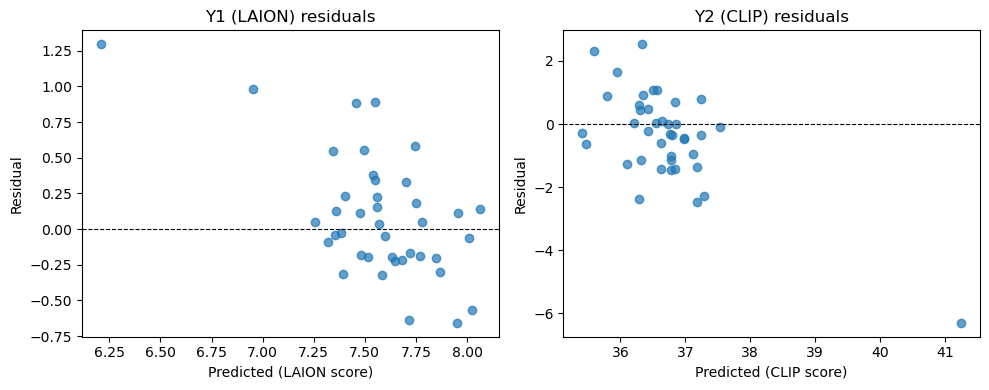

In [99]:
# Residual plot: predicted vs residual (test set)
res1 = y1_test - y1_pred_linreg
res2 = y2_test - y2_pred_linreg
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(y1_pred_linreg, res1, alpha=0.7)
axes[0].axhline(0, color="k", linestyle="--", linewidth=0.8)
axes[0].set_xlabel("Predicted (LAION score)")
axes[0].set_ylabel("Residual")
axes[0].set_title("Y1 (LAION) residuals")
axes[1].scatter(y2_pred_linreg, res2, alpha=0.7)
axes[1].axhline(0, color="k", linestyle="--", linewidth=0.8)
axes[1].set_xlabel("Predicted (CLIP score)")
axes[1].set_ylabel("Residual")
axes[1].set_title("Y2 (CLIP) residuals")
plt.tight_layout()
plt.show()